In [852]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import ndimage
import json
import time
import os
from PIL import Image


In [853]:
# pip install scikit-learn instead of sklearn
from sklearn import preprocessing


# 模板

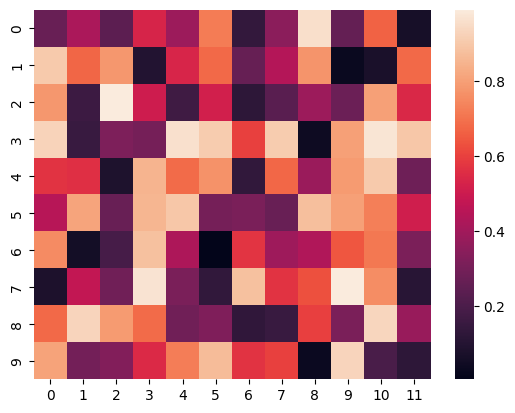

In [854]:
uniform_data = np.random.rand(10, 12)  # 自定义数据
ax = sns.heatmap(uniform_data)


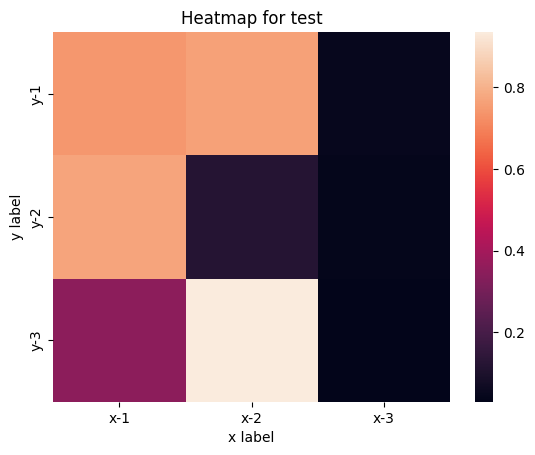

In [855]:
values = np.random.rand(3, 3)
x_ticks = ['x-1', 'x-2', 'x-3']
y_ticks = ['y-1', 'y-2', 'y-3']  # 自定义横纵轴
ax = sns.heatmap(values, xticklabels=x_ticks, yticklabels=y_ticks)
ax.set_title('Heatmap for test')  # 图标题
ax.set_xlabel('x label')  # x轴标题
ax.set_ylabel('y label')
plt.show()
figure = ax.get_figure()
# figure.savefig('sns_heatmap.jpg')  # 保存图片


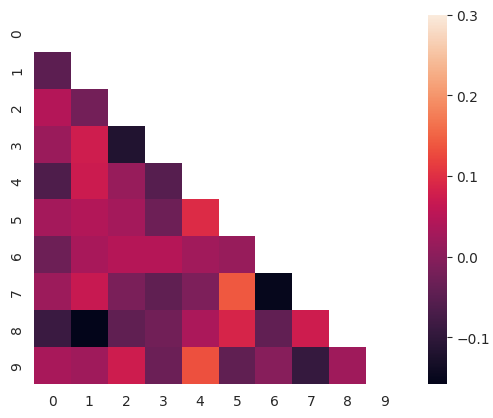

In [856]:
# 使用掩码，绘制部分数据
corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


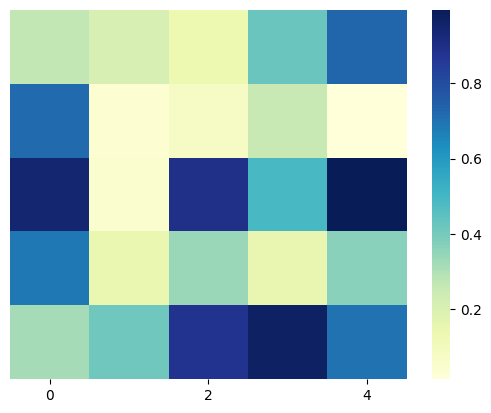

In [857]:
values = np.random.rand(5, 5)
ax = sns.heatmap(values, cmap="YlGnBu", xticklabels=2,
                 yticklabels=False)  # x轴变2倍，隐藏y轴


# 实现

## 师兄的代码

In [858]:
min_max_scaler = preprocessing.MinMaxScaler()


In [859]:
class HeatMap:
    def __init__(self):
        # 根据时间生成随机数，保证每次都不一样
        np.random.seed(int(time.time()))
        self.fig, self.axes = plt.subplots()

    def plot_heatmap(self, img, heatmap):
        print("Image shape", img.shape)
        normalized_heat_map = self.get_heatmap_array(img, heatmap)
        # 去除坐标轴
        # self.axes.cla()
        self.axes.imshow(img)
        # self.axes.imshow(255 * normalized_heat_map, alpha=0.5, cmap="RdBu")
        # self.axes.set_axis_off()
        self.axes = sns.heatmap(255 * normalized_heat_map, cmap='Set1_r',
                                ax=self.axes, annot=False, fmt='0.1g', alpha=0.5)
        plt.show()

    def get_heatmap_array(self, img, heat):
        height, width, _ = img.shape
        print(height, width)
        print(heat[:10])
        heat[:, 0] *= height
        heat[:, 1] *= width
        print(heat[:10])
        x = np.zeros((height, width))

        def count_heat(i):
            try:
                x[int(i[0]), int(i[1])] += 1
            except:
                pass
        # 必选参数：func,axis,arr。其中func是我们自定义的一个函数，函数func(arr)中的arr是一个数组，函数的主要功能就是对数组里的每一个元素进行变换，得到目标的结果。其中axis表示函数func对数组arr作用的轴。
        np.apply_along_axis(count_heat, axis=1, arr=heat)
        heat_map = ndimage.gaussian_filter(x, sigma=15)
        # 归一化
        normalized_heat_map = min_max_scaler.fit_transform(heat_map)
        return normalized_heat_map

    @staticmethod
    def get_json_file():
        # current_work_dir = os.path.abspath(os.path.dirname(os.path.dirname(__file__)))
        current_work_dir = '..'
        json_path = os.path.join(current_work_dir, 'gaze.json')
        with open(json_path, 'r+') as f:
            data = json.load(f)
        gaze = np.asarray(data['direction'], dtype=np.float32)
        return gaze


In [860]:
gaze = HeatMap.get_json_file()
gaze[:10]


array([[-1.9570904e+01, -5.9927568e+00],
       [-1.7335554e+01, -1.6113143e+00],
       [-1.6866760e+01, -3.7281806e+00],
       [-1.7725149e+01,  6.5576100e-01],
       [-1.3105719e+01, -9.4351158e+00],
       [-1.9558563e+01, -1.4426260e+00],
       [-1.7500216e+01, -1.2273812e+01],
       [-1.6933186e+01,  3.6534315e-03],
       [-1.6938591e+01, -3.4769509e+00],
       [-1.4982329e+01,  2.7985408e+00]], dtype=float32)

## 0-1 归一化

In [861]:
data_train_nomal = min_max_scaler.fit_transform(gaze)


In [862]:
min_max_scaler.scale_
min_max_scaler.min_


array([0.9766039, 0.4885732], dtype=float32)

In [863]:
data_train_nomal[:10]


array([[0.23499471, 0.34674188],
       [0.31969982, 0.45043802],
       [0.33746403, 0.40033787],
       [0.3049367 , 0.50409317],
       [0.4799829 , 0.26527116],
       [0.23546231, 0.4544304 ],
       [0.31346023, 0.1980874 ],
       [0.33494693, 0.48865965],
       [0.33474213, 0.40628377],
       [0.40887165, 0.5548066 ]], dtype=float32)

Image shape (768, 1024, 3)
768 1024
[[0.23499471 0.34674188]
 [0.31969982 0.45043802]
 [0.33746403 0.40033787]
 [0.3049367  0.50409317]
 [0.4799829  0.26527116]
 [0.23546231 0.4544304 ]
 [0.31346023 0.1980874 ]
 [0.33494693 0.48865965]
 [0.33474213 0.40628377]
 [0.40887165 0.5548066 ]]
[[180.47594 355.0637 ]
 [245.52946 461.24854]
 [259.17236 409.94598]
 [234.19139 516.1914 ]
 [368.6269  271.63766]
 [180.83505 465.33673]
 [240.73746 202.84149]
 [257.23926 500.38748]
 [257.08197 416.03458]
 [314.01343 568.12195]]


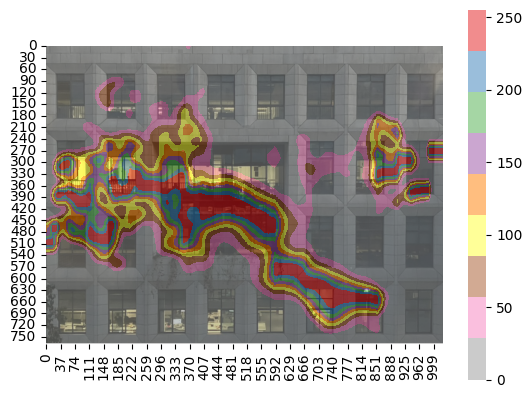

In [864]:
heatmap = HeatMap()
img = np.array(Image.open('1.jpeg'))
heatmap.plot_heatmap(img, data_train_nomal)
